# Leave-one-out Cross Validation

In [15]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut, cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Create dataset
X, y = make_blobs(n_samples=500, centers=2, cluster_std=4, random_state=1)

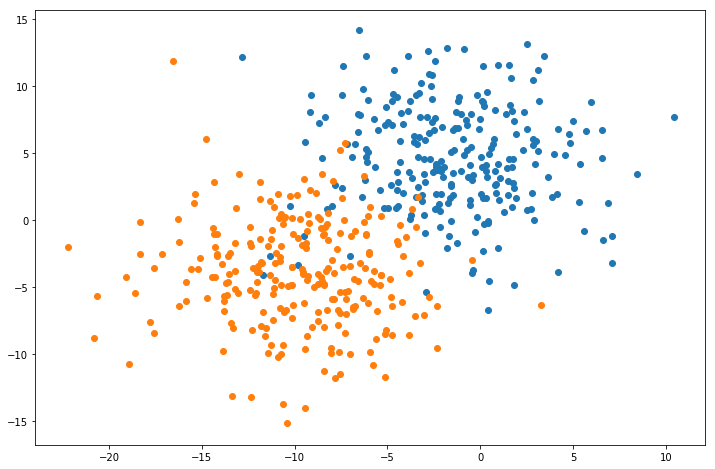

In [17]:
# Visualize
fig, ax = plt.subplots(figsize=(12, 8))

for class_val in range(2):
    row_idx = np.where(y == class_val)
    ax = plt.scatter(X[row_idx, 0], X[row_idx, 1])
plt.show()

In [18]:
# Manual LOOCV Procedure
cv = LeaveOneOut()

# Enumerate Splits
y_true, y_pred = list(), list()
for train_idx, test_idx in cv.split(X):
    # Split data
    X_train, X_test = X[train_idx, :], X[test_idx, :]
    y_train, y_test = y[train_idx], y[test_idx]
    model = SVC(kernel='linear', gamma='scale')
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    y_true.append(y_test[0])
    y_pred.append(y_hat[0])


acc = accuracy_score(y_true, y_pred)
print('Predictions', y_pred)
print('Accuracy: %.3f' % acc)

Predictions [1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 

In [19]:
# LOOCV using cross_val_score()
cv = LeaveOneOut()
model = SVC(kernel='linear', gamma='scale')
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# For predictions
y_pred = cross_val_predict(model, X, y, cv=cv, n_jobs=-1)
print('Predictions: \n', y_pred)
print('Accuracy: %.3f mean %.3f std' % (np.mean(scores), np.std(scores)))


Predictions: 
 [1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0
 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1
 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0
 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1
 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0
 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0
 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1
 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1
 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1
 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0
 1 0 1 1 0

# Decision Boundary for SVM

In [20]:
# Define bounds of the input domain(feature space)
min_1, max_1 = X[:, 0].min() - 1, X[:, 0].max() + 1
min_2, max_2 = X[:, 1].min() - 1, X[:, 1].max() + 1

# Define x and y scale
x1_grid = np.arange(min_1, max_1, 0.1)
x2_grid = np.arange(min_2, max_2, 0.1)

# Create meshgrid
xx, yy = np.meshgrid(x1_grid, x2_grid)

# Flatten grid to create samples to be fed into model and make prediction
flat_1, flat_2 = xx.flatten(), yy.flatten()
flat_1, flat_2 = flat_1.reshape((len(flat_1), 1)), flat_2.reshape((len(flat_2), 1))

grid = np.hstack((flat_1, flat_2))

In [23]:
y.shape

(500,)

In [24]:
# Make predictions for the grid
model.fit(X, y)
y_hat = model.predict(grid)

# Reshape predictions to conform to grid shape
zz = y_hat.reshape(xx.shape)

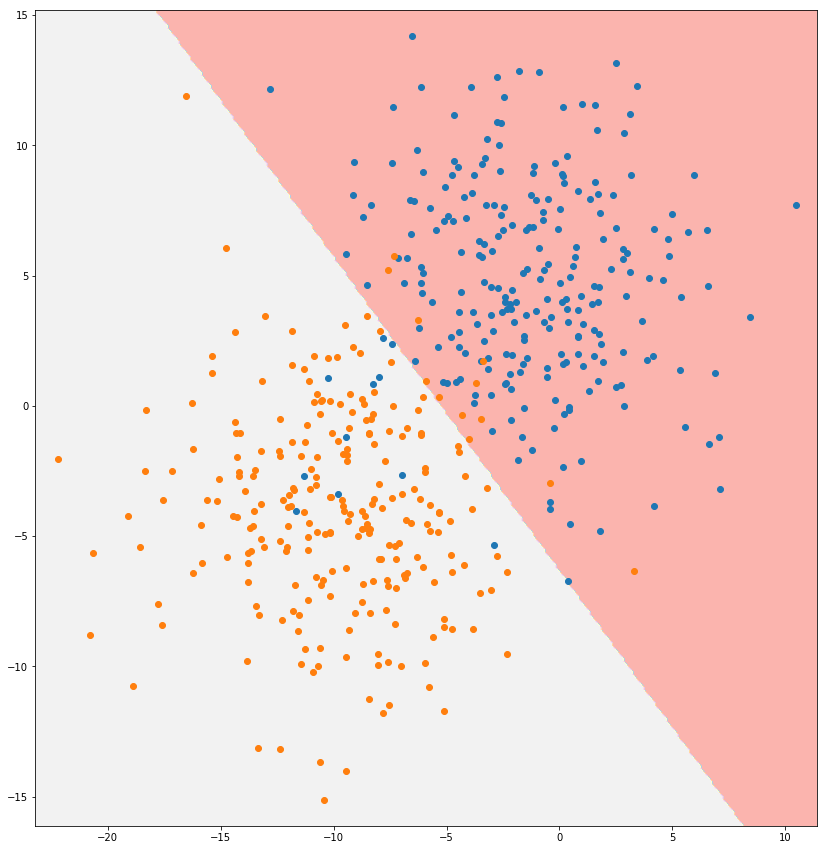

In [26]:
fig, ax = plt.subplots(figsize=(14, 15))

# Plot xx, yy, zz as a surface
ax.contourf(xx, yy, zz, cmap='Pastel1')

# Create scatterplot for samples from each class
for class_val in range(2):
    # Get row indices for samples with the class
    row_idx = np.where(y == class_val)

    # Create scatterplot of these samples
    ax.scatter(X[row_idx, 0], X[row_idx, 1], cmap='cividis')

plt.show()